In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten


In [5]:
def readData(filename):
    print("Reading %s" % filename)
    ds = pd.read_csv(filename, header=None, dtype=float)
    return ds
s1 = readData('sounds/sound1.dat')
s2 = readData('sounds/sound2.dat')

Reading sounds/sound1.dat
Reading sounds/sound2.dat


In [157]:
S = np.hstack((s1,s2))

In [160]:
permuted_rows = np.random.permutation(S.shape[0])

In [17]:
std = np.std(S)
std

0.99871651244591431

In [180]:
def add_noise(data, noise_dist = 'guassian'):
    n = None
    total_rows = data.shape[0]
    if noise_dist == 'guassian':
        n = np.random.normal(0, std, (total_rows,1))
    elif noise_dist == 'laplace':
        n = np.random.laplace(loc=0, scale=1, size=(total_rows,1))

    X = np.append(S, n, axis=1)
    return X
S_guassian = add_noise(S, noise_dist='guassian')

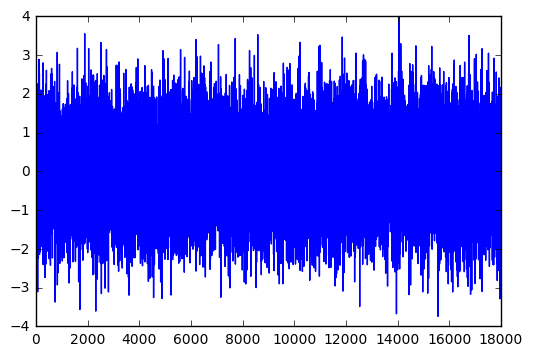

In [185]:
# plt.plot(S_guassian[:,0])
# plt.plot(S_guassian[:,1])
# plt.plot(S_guassian[:,2])

In [169]:
S_laplace = add_noise(S, noise_dist='laplace')

(18000, 3)


In [170]:
def create_random_matrix(dim=3, salt = 0.01):
    A = np.random.random_sample((dim,dim))
    A = A + salt*np.diag([1]*dim) # make sure that A is always invertable 
    A_inv = np.linalg.inv(A)
    return A,A_inv
mixing_A, mixing_A_inv = create_random_matrix(3)

In [187]:
X_guassian = np.dot(mixing_A, S_guassian.T)[:, permuted_rows]
X_laplace = np.dot(mixing_A, S_laplace.T)[:, permuted_rows]

In [188]:
X_guassian.shape

(3, 18000)

In [189]:
W_init,_ = create_random_matrix(3)

In [190]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

(3, 18000)
(3, 18000)
Epoch 0
Epoch 1


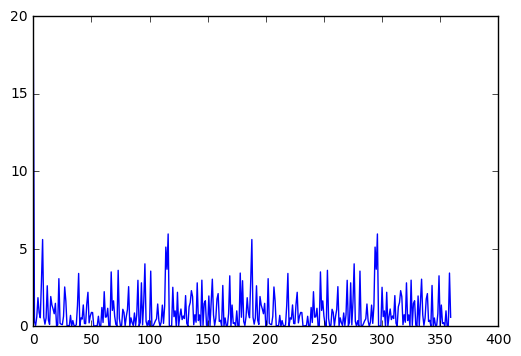

In [216]:
import scipy as sp
def naturalGradientLearning(x, w_init, original_data, eta=0.1, epoch=10, lambda_=0.9):
    w = w_init
    p = x.shape[1]
#     print(w.shape)
    print(x.shape)
    norm = []
    x = (x.T - np.mean(x, axis=1)).T
    print(x.shape)
    for e in range(epoch):
        print("Epoch %d" % e)
        for i in range(p):
            eta = lambda_*eta
            w_dot_x = np.dot(w, x[:,i])
            gradient = np.vstack((w_dot_x,w_dot_x,w_dot_x))
            gradient = sigmoid(gradient)*2
            gradient = np.ones(gradient.shape) - gradient

            gradient = gradient * x[:,i].flatten()
            normalization = np.dot(w.T,w)
            
            gradient = np.dot(gradient, normalization)


            grad = gradient
            w = ( w + lambda_*grad*eta )
            if i % 100 == 0:
                norm.append( np.linalg.norm(grad) )
    return w, norm

w_guassian, guassian_norms = naturalGradientLearning(X_guassian, W_init, S_guassian.T, epoch=2, eta=0.5, lambda_=0.58)
plt.plot(guassian_norms)

(3, 18000)
(3, 18000)
Epoch 0
(3, 18000)


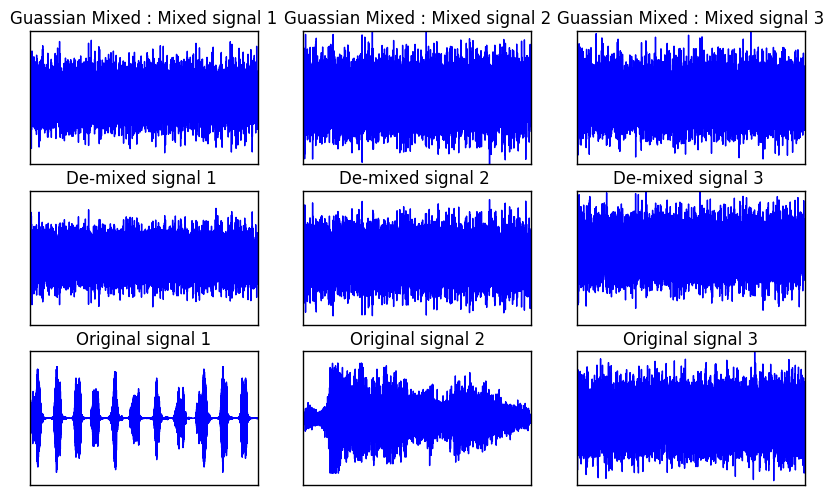

In [215]:
def plotExperiment(x, w_init, original_s,  dataset=""):
    total = x.shape[1]
    x_range = np.array(range(total))
    
    plt.figure(figsize=(10,10))
    
    for i in range(x.shape[0]):
        plt.subplot(5,3,i+1)
        plt.plot(x_range, x[i,:].T)
        plt.title('%s : Mixed signal %d' % (dataset, i+1) )
        plt.xticks([])
        plt.yticks([])


    w_nat, norm_nat = naturalGradientLearning(x, w_init, original_s, epoch=1, eta=0.2, lambda_=0.58)
    s_est = np.dot(w_nat,x) 
#     corr = computeCorrelation(s_est, original_s)
    print(x.shape)
    for i in range(x.shape[0]):
        plt.subplot(5,3,3+ i+1)
        plt.plot(x_range, s_est[i,:].T)
        plt.title('%s %d ' % ('De-mixed signal', i+1) )
        plt.xticks([])
        plt.yticks([])
        
    for i in range(x.shape[0]):
        plt.subplot(5,3, 6+ i+1)
        plt.plot(x_range, original_s[i,:].T)
        plt.title('%s %d' % ('Original signal', i+1) )
        plt.xticks([])
        plt.yticks([])
    
#     plt.subplot(5,2,10)
#     plt.plot(norm_nat)
    plt.title('Gradient of Natural gradient')
plotExperiment(X_guassian, W_init, S_guassian.T, dataset="Guassian Mixed")    

(3, 18000)
(3, 18000)
Epoch 0
(3, 18000)


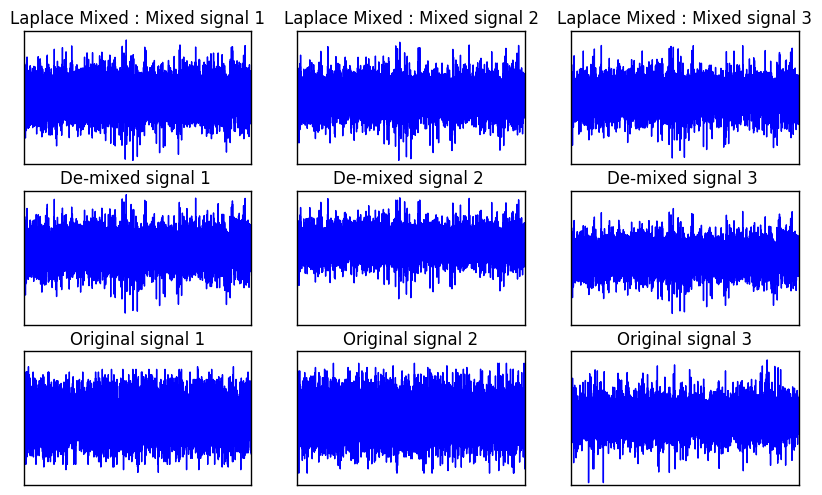

In [218]:
plotExperiment(X_laplace, W_init, S_laplace.T, dataset="Laplace Mixed")    

# 6.2) Computing n-moments

In [227]:
gauss   = np.random.randn(100)
laplas = np.random.laplace(size=100)
uni    = np.random.uniform(-1,1,size=100)

In [255]:
from scipy import stats

np.mean(gauss)
np.std(gauss)
scipy.stats.skew(laplas)
scipy.stats.kurtosis(laplas, fisher=False)

5.020415695856769

In [256]:
def moment(x, i):
    mean = np.mean(x)
    if i == 1:
        return mean
    return np.mean(np.power(x - mean, i )) / np.power( np.mean(np.power(x-mean, 2)), i/2.0 )

moment_desc = ""
for i in ['mean', ]

5.0204156958567694

In [276]:
# !pip install PrettyTable
from prettytable import PrettyTable
tb = PrettyTable(["Moment ith", "Laplace(0,1)", "Gauss(0,1)", "Uniform(-1,1)"])

moment_desc = ['mean', 'variance', 'skewness', 'kurtosis']
for i in range(1,5):
    c = lambda x: moment(x, i)
    tb.add_row([moment_desc[i-1],c(laplas), c(gauss), c(uni)])
    
print(tb.get_string())

+------------+--------------------+-------------------+-------------------+
| Moment ith |    Laplace(0,1)    |     Gauss(0,1)    |   Uniform(-1,1)   |
+------------+--------------------+-------------------+-------------------+
|    mean    | -2.41881075018e-17 | 1.22922882766e-17 | 1.04218684462e-17 |
|  variance  |        1.0         |        1.0        |        1.0        |
|  skewness  |   0.387549085391   |  -0.184506530344  |  -0.263700281056  |
|  kurtosis  |   5.02041569586    |   2.90288213215   |   2.19293015913   |
+------------+--------------------+-------------------+-------------------+
